In [1]:
import moviepy.editor as mp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal
import wave, sys
import audio2numpy as a2n
from audio2numpy import open_audio
from scipy.fft import fft, ifft
from scipy.io import wavfile
from scipy.io.wavfile import read
import scipy.io
from pydub import AudioSegment
import pandas as pd
import os
import glob
import ffmpeg

In [61]:
### Define all video paths and file titles

# raw_video_dir = r'\Users\greenhouselab\Documents\Rubi\typingtask_data\pilot_data\p08_marygach_08022022\task_video\right\raw' ## change as needed
# save_dir = r'\Users\greenhouselab\Documents\Rubi\typingtask_data\pilot_data\p08_marygach_08022022\task_video\right\edited' ## change as needed
# whole_video_name = r'p08_08022022_right_wholetask.mp4' ## change to match task subject, date, and camera view
# all_clips_name = r'p08_08022022_right_allclips.mp4'
# audio_name = r'p08_08022022_right.wav' ## change to match task subject, date, and camera view
# video_prefix = 'p08_08022022_right'
# os.chdir(save_dir)

sID = 's262' ## change as needed
cam_view = 'aerial' ## change as needed

server = r'/Volumes/greenhouse/typingtask_data/subject_data/'
os.chdir(server)
sub_folder = glob.glob(f'{sID}_*')[0]
raw_video_dir = server + sub_folder + '/task_video/' + cam_view + '/raw/'
save_dir = server + sub_folder + '/task_video/' + cam_view + '/edited/'
whole_video_name = sub_folder + '_' + cam_view + '_wholetask.mp4'
all_clips_name = sub_folder + '_' + cam_view + '_allclips.mp4'
audio_name = sub_folder + '_' + cam_view + '.wav'
video_prefix = sub_folder + '_' + cam_view
os.chdir(save_dir)

In [26]:
### concatenating all go-pro videos of interest into one
f = open('video_path_file.txt', 'w')
for filename in os.scandir(raw_video_dir):
    if filename.is_file():
        f.write('file \'' + filename.path + '\'')
        f.write('\n')
f.close()

concatenate = 'ffmpeg -f concat -safe 0 -i video_path_file.txt -c copy %s'  % (whole_video_name)
os.system(concatenate) ## output of 0 means it worked :) 

ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with clang version 18.1.8
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1743376098333/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1743376098333/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --disable-gnutls --enable-libvpx --enable-libass --enable-pthreads --e

0

In [27]:
### importing whole task video into moviepy format
video_dir = save_dir + whole_video_name
video = mp.VideoFileClip(video_dir)

In [28]:
### extracting audio file from video
audio = video.audio.write_audiofile(audio_name)

MoviePy - Writing audio in s262_01232024_aerial.wav


MoviePy - Done.


In [29]:
### turning stereo audio file to mono
audio = AudioSegment.from_wav(audio_name)
audio = audio.set_channels(1)
audio = audio.export(save_dir + '\\' + audio_name, format="wav")

In [30]:
### making numpy array from audio file
sample_rate, samples = wavfile.read(audio)

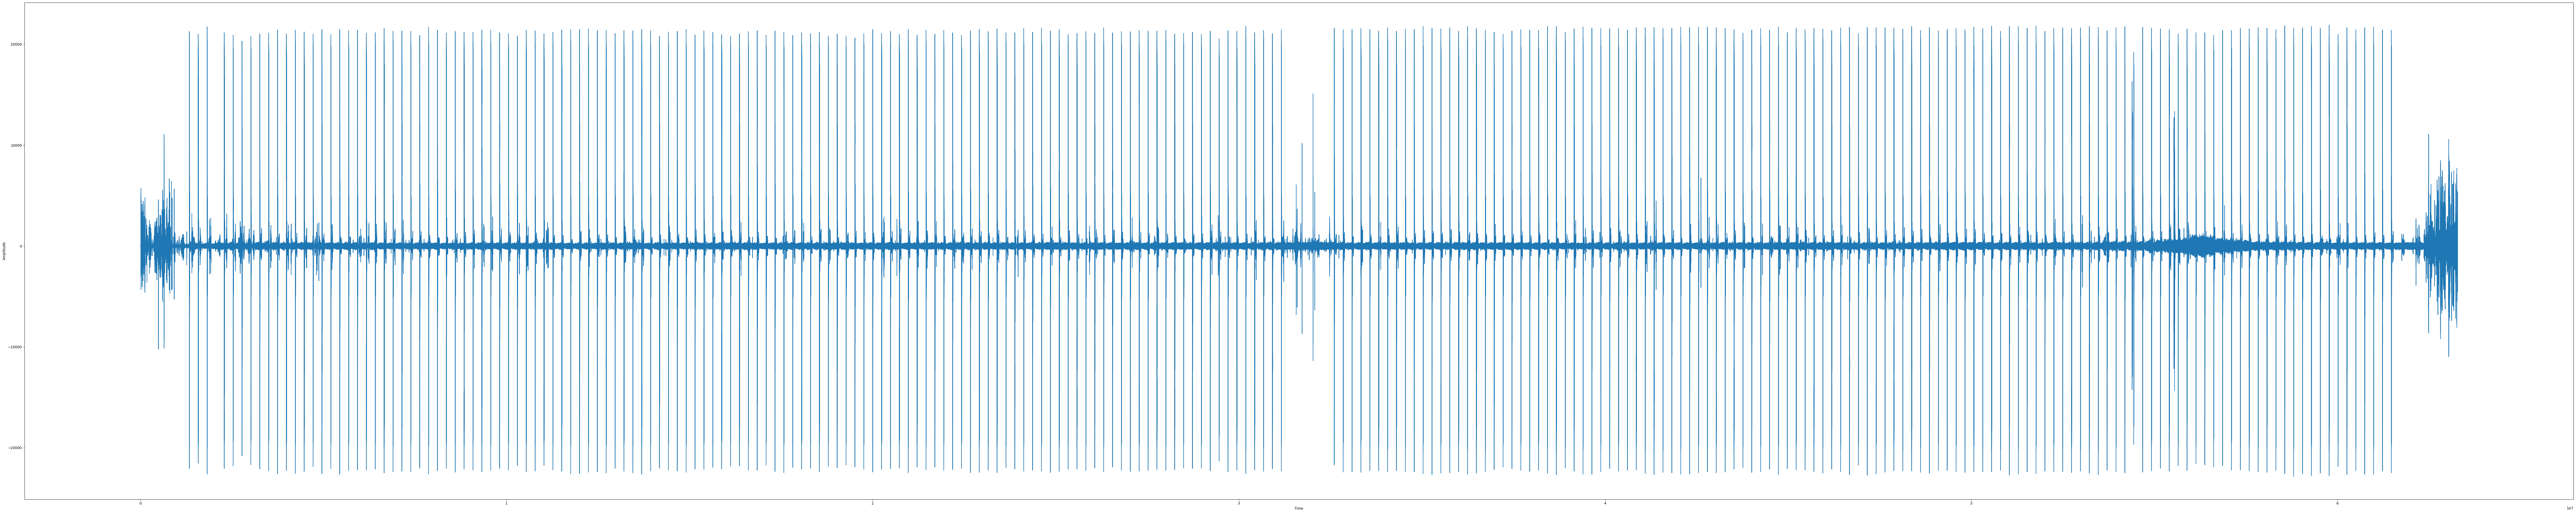

In [31]:
### Plotting sound file
plt.rcParams["figure.figsize"] = [100, 20]
plt.rcParams["figure.autolayout"] = True
input_data = samples
plt.plot(input_data)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.ylim()
plt.xlim()
plt.show()

In [32]:
# run peak detection to see if there are 240 peaks here
indexes, _ = scipy.signal.find_peaks(samples, height=7, distance=2.1)
print('Peaks are: %s' % (indexes))
print(len(indexes))

Peaks are: [   10666    10680    10849 ... 63277276 63277284 63277312]
1970209


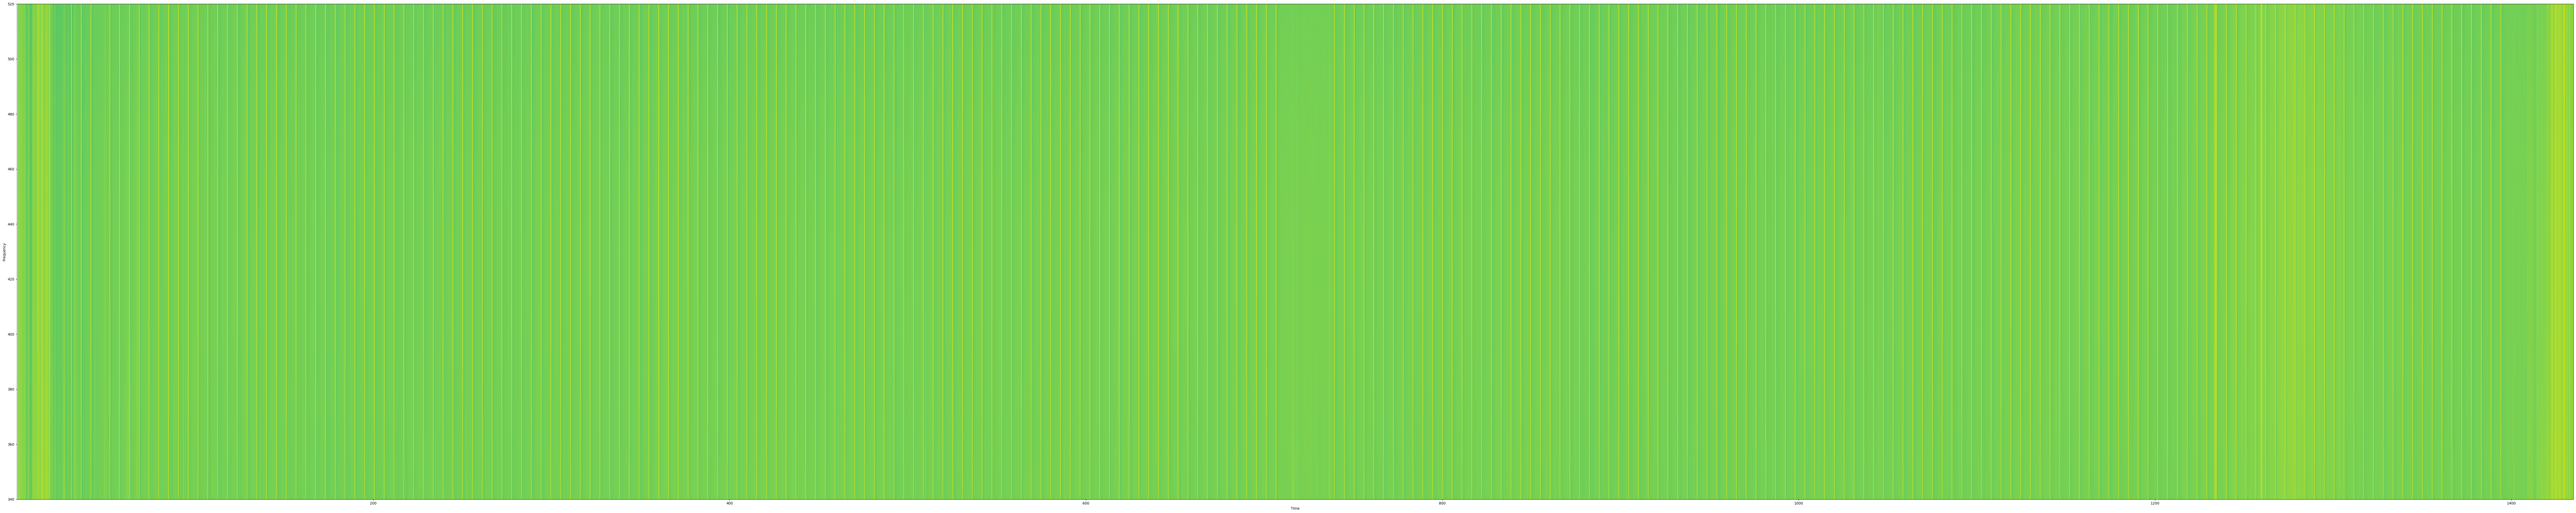

In [33]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(samples, Fs=sample_rate)
plt.rcParams["figure.figsize"] = [12, 6]
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(340, 520)
plt.show()

In [34]:
## need to go through the row that correponds with 440hz (2 and 3 are closest) in powerspectrum, and time stamps of peaks. 
frequenciesFound

array([    0.      ,   172.265625,   344.53125 ,   516.796875,
         689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
        1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
        2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
        2756.25    ,  2928.515625,  3100.78125 ,  3273.046875,
        3445.3125  ,  3617.578125,  3789.84375 ,  3962.109375,
        4134.375   ,  4306.640625,  4478.90625 ,  4651.171875,
        4823.4375  ,  4995.703125,  5167.96875 ,  5340.234375,
        5512.5     ,  5684.765625,  5857.03125 ,  6029.296875,
        6201.5625  ,  6373.828125,  6546.09375 ,  6718.359375,
        6890.625   ,  7062.890625,  7235.15625 ,  7407.421875,
        7579.6875  ,  7751.953125,  7924.21875 ,  8096.484375,
        8268.75    ,  8441.015625,  8613.28125 ,  8785.546875,
        8957.8125  ,  9130.078125,  9302.34375 ,  9474.609375,
        9646.875   ,  9819.140625,  9991.40625 , 10163.671875,
       10335.9375  , 10508.203125, 10680.46875 , 10852.

In [35]:
time[2]

np.float64(0.008707482993197279)

In [36]:
powerSpectrum[3]

array([  0.        ,   0.        ,   0.        , ..., 205.21048972,
       247.64913576, 663.27722254], shape=(494353,))

In [37]:
# def find_beep(freq):
#     lowA = pd.()
#     for x in freq:
#         lowA.append(x)

In [38]:
# find_beep(powerSpectrum[3])

In [39]:
## other beep is 523.25Hz


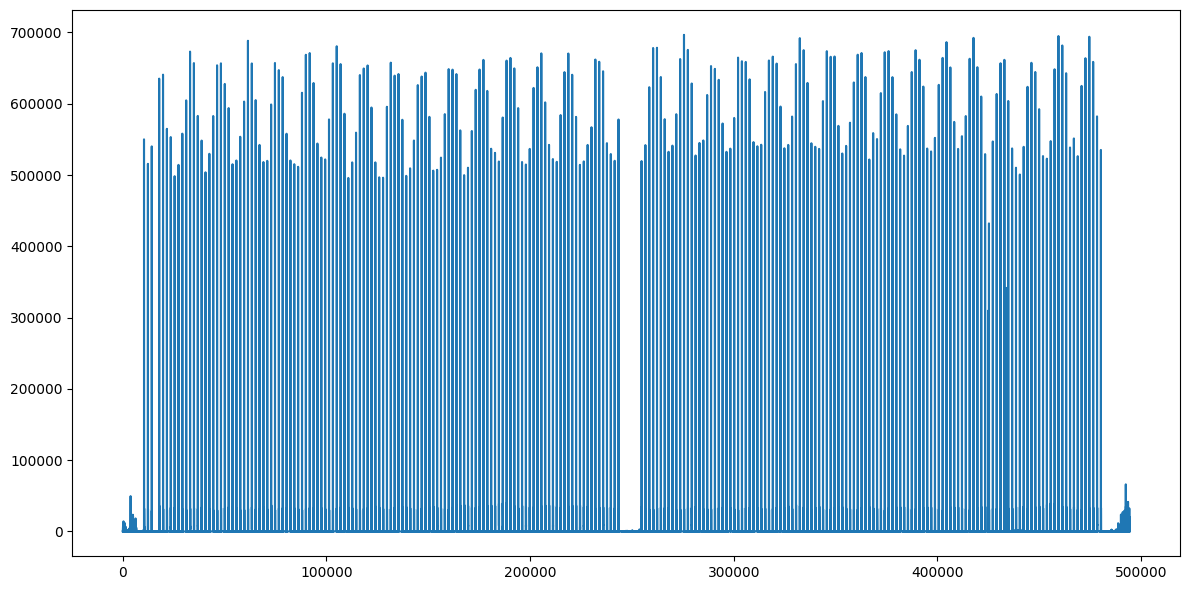

<Figure size 12000x2000 with 0 Axes>

In [40]:
lowA = np.array(powerSpectrum[2])
# plt.rcParams.update({'font.size': 50})
plt.plot(lowA)
plt.xlim()
plt.ylim()
plt.figure(figsize=(120, 20))
plt.show()

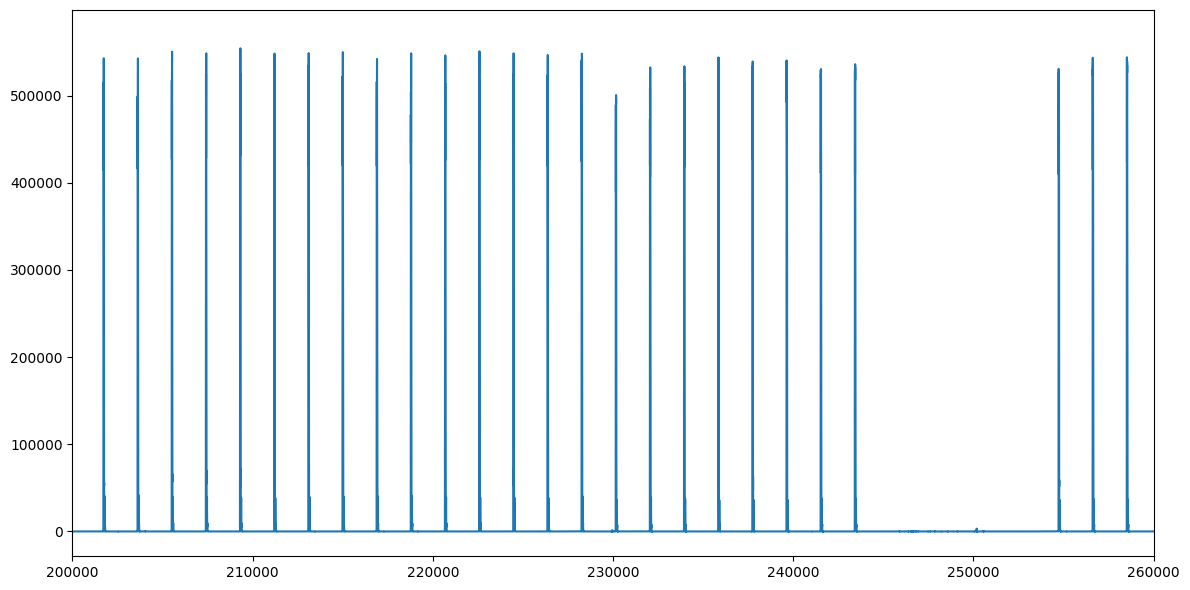

In [69]:
highA = np.array(powerSpectrum[3])
plt.plot(highA)
# plt.figure(figsize=(120, 20))
plt.xlim(200000, 260000)
plt.ylim()
# plt.xticks(np.arange(0, 190000, step=5000))
plt.show()

In [49]:
indexes, _ = scipy.signal.find_peaks(highA, height=350000, distance=120)
len(indexes)

243

In [50]:
indexes

array([ 10485,  12380,  14275,  17931,  19821,  21716,  23611,  25506,
        27401,  29296,  31192,  33087,  34982,  36877,  38772,  40667,
        42562,  44457,  46353,  48248,  50143,  52038,  53933,  55828,
        57723,  59619,  61514,  63409,  65304,  67199,  69094,  70984,
        72885,  74775,  76670,  78565,  80460,  82355,  84250,  86145,
        88041,  89936,  91831,  93726,  95621,  97516,  99411, 101307,
       103202, 105097, 106992, 108887, 110782, 112677, 114572, 116468,
       118363, 120258, 122153, 124048, 125943, 127838, 129733, 131629,
       133524, 135419, 137314, 139209, 141104, 142999, 144895, 146790,
       148685, 150580, 152475, 154370, 156265, 158160, 160056, 161951,
       163846, 165741, 167636, 169531, 171426, 173322, 175217, 177112,
       179007, 180902, 182797, 184692, 186587, 188483, 190378, 192273,
       194168, 196058, 197953, 199848, 201744, 203639, 205534, 207429,
       209324, 211219, 213114, 215009, 216905, 218800, 220695, 222590,
      

In [64]:
np.argwhere(indexes == 491663)

array([], shape=(0, 1), dtype=int64)

In [53]:
## deleting unwanted peaks (should only be used for data pre-block indicating beep)
indexes = np.delete(indexes, [0, 1, 2])
len(indexes) ## length should always be 240

240

In [70]:
## get time stamps for each peak from 'time' output of spectrogram
def find_peak_times(): 
    peak_times = np.empty(np.shape(indexes))
    for idx, x in enumerate(indexes):
        stamp = time[x]
        peak_times[idx] = stamp
    return peak_times

array([  52.04752834,   57.53324263,   63.03346939,   68.53369615,
         74.0339229 ,   79.53414966,   85.03437642,   90.53750567,
         96.03773243,  101.53795918,  107.03818594,  112.5384127 ,
        118.03863946,  123.53886621,  129.03909297,  134.54222222,
        140.04244898,  145.54267574,  151.04290249,  156.54312925,
        162.04335601,  167.54358277,  173.04671202,  178.54693878,
        184.04716553,  189.54739229,  195.04761905,  200.5478458 ,
        206.03356009,  211.55120181,  217.0369161 ,  222.53714286,
        228.03736961,  233.53759637,  239.03782313,  244.53804989,
        250.03827664,  255.5414059 ,  261.04163265,  266.54185941,
        272.04208617,  277.54231293,  283.04253968,  288.54276644,
        294.04589569,  299.54612245,  305.04634921,  310.54657596,
        316.04680272,  321.54702948,  327.04725624,  332.54748299,
        338.05061224,  343.550839  ,  349.05106576,  354.55129252,
        360.05151927,  365.55174603,  371.05197279,  376.55219

In [55]:
cut_times = (find_peak_times()).tolist()
len(cut_times) ## should still be 240
cut_times

[52.0475283446712,
 57.53324263038549,
 63.033469387755105,
 68.53369614512472,
 74.03392290249433,
 79.53414965986394,
 85.03437641723356,
 90.53750566893424,
 96.03773242630386,
 101.53795918367346,
 107.03818594104308,
 112.5384126984127,
 118.03863945578232,
 123.53886621315193,
 129.03909297052155,
 134.54222222222222,
 140.04244897959182,
 145.54267573696146,
 151.04290249433106,
 156.5431292517007,
 162.0433560090703,
 167.5435827664399,
 173.0467120181406,
 178.5469387755102,
 184.04716553287983,
 189.54739229024943,
 195.04761904761904,
 200.54784580498867,
 206.03356009070293,
 211.55120181405897,
 217.03691609977324,
 222.53714285714287,
 228.03736961451247,
 233.53759637188207,
 239.0378231292517,
 244.5380498866213,
 250.03827664399094,
 255.5414058956916,
 261.04163265306124,
 266.54185941043085,
 272.04208616780045,
 277.54231292517005,
 283.04253968253965,
 288.5427664399093,
 294.04589569161,
 299.5461224489796,
 305.0463492063492,
 310.5465759637188,
 316.046802721088

In [56]:
for idx, cut in enumerate(cut_times):
    command = 'ffmpeg -t 3.5 -ss %s -i "%s" -y %s_trial_%s.mp4' % (cut, video_dir, video_prefix, idx)
    # print(command)
    os.system(command)

ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with clang version 18.1.8
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1743376098333/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1743376098333/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --disable-gnutls --enable-libvpx --enable-libass --enable-pthreads --e

In [63]:
### concatenating clipped trial videos into one

res = []
for file in os.listdir(save_dir):
    if file.__contains__('trial'):
        res.append(file)
print(len(res))

f = open('clip_path_file.txt', 'w')
for filename in res:
        f.write('file \'' + save_dir + filename + '\'')
        f.write('\n')
f.close()

concatenate = 'ffmpeg -f concat -safe 0 -i clip_path_file.txt -c copy %s'  % (all_clips_name)
os.system(concatenate) ## output of 0 means it worked :) 

240


ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with clang version 18.1.8
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1743376098333/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1743376098333/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --disable-gnutls --enable-libvpx --enable-libass --enable-pthreads --e

0

In [60]:
save_dir

'/Volumes/greenhouse/typingtask_data/subject_data/s262_01232024/task_video/aerial/edited/'